# spleeter 과정 제외한 음원 장르 분석 모델

In [1]:
# 필요한 패키지 임포트
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

# Librosa for 음원 분석
import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')

In [32]:
import os

general = "/content/drive"
audio_path = f"{general}" + "/Othercomputers/MacBookAir/사운드"
output_path = f"{general}" + "/MyDrive/audio_output"

In [33]:
def song_names(audio_path):
    files = list(os.listdir(f'{audio_path}'))

    songs = []
    paths = []

    for file in files:
        song = f'{file}'
        path = f'{audio_path}/{file}'
        songs.append(song)
        paths.append(path)

    return songs, paths

In [34]:
songs, paths = song_names(audio_path)

In [35]:
print(songs)

['donttrustthedawn_sound.wav', 'goodbye_sound.wav', 'goodmorning_sound.wav', 'timelapse_sound.wav', 'wildflower_sound.wav']


In [36]:
paths

['/content/drive/Othercomputers/MacBookAir/사운드/donttrustthedawn_sound.wav',
 '/content/drive/Othercomputers/MacBookAir/사운드/goodbye_sound.wav',
 '/content/drive/Othercomputers/MacBookAir/사운드/goodmorning_sound.wav',
 '/content/drive/Othercomputers/MacBookAir/사운드/timelapse_sound.wav',
 '/content/drive/Othercomputers/MacBookAir/사운드/wildflower_sound.wav']

## paths를 사용해서 음원별 특징 추출하기

In [11]:
#song_path = {}

#for i, path in enumerate(paths):
#    song_path[i] = path

### librosa 활용

In [18]:
y, sr = librosa.load(paths[0])
audio_file, _ = librosa.effects.trim(y)

In [47]:
s_duration = 1 / sr
print(f"Duration of 1 sample is: {s_duration:.6f} seconds")

Duration of 1 sample is: 0.000045 seconds


In [48]:
duration = librosa.get_duration(audio_file, sr)     # s_duration * len(audio_file) 와 동일; 음원 전체 시간
print(f"Duration of signal is: {duration:.2f} seconds")

Duration of signal is: 226.77 seconds


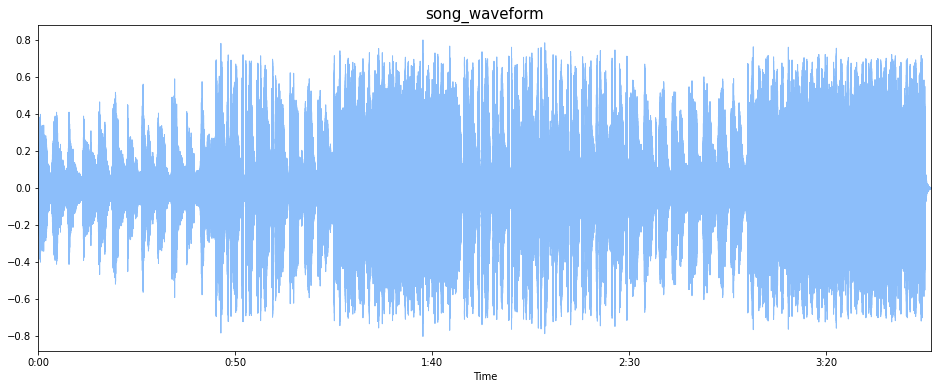

In [8]:
plt.figure(figsize = (16, 6))
librosa.display.waveplot(y = audio_file, sr = sr, color = "#8cbefa");
plt.title("song_waveform", fontsize = 15);

In [50]:
n_fft = 2048 # FFT window size
hop_length = 512

stft = np.abs(librosa.stft(audio_file, n_fft=n_fft, hop_length=hop_length))

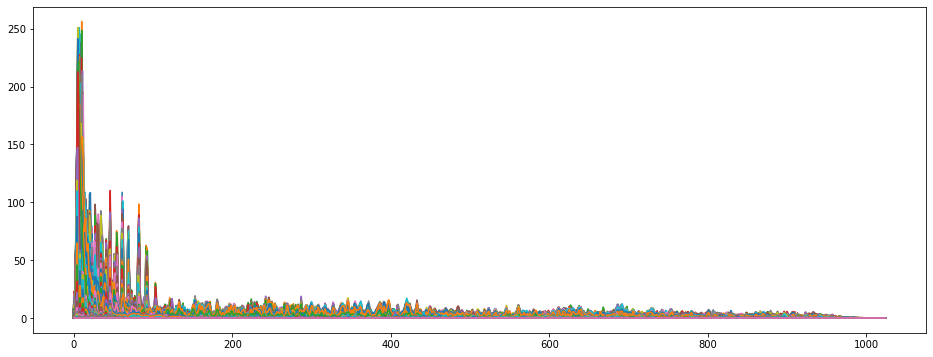

In [51]:
plt.figure(figsize=(16,6))
plt.plot(stft);

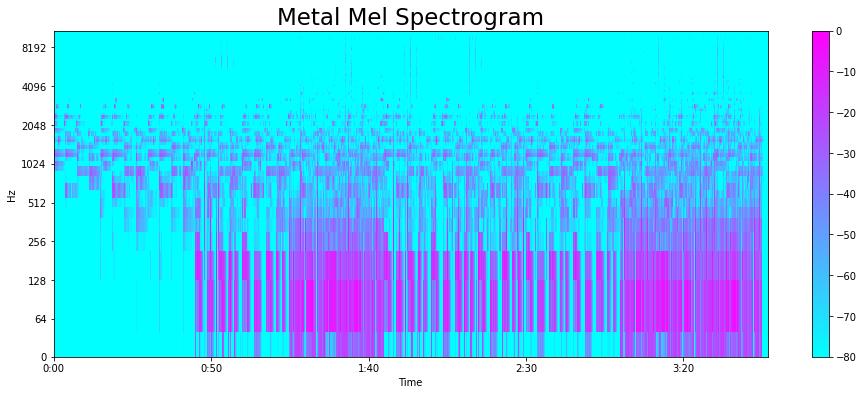

In [52]:
y, sr = librosa.load(paths[0])
audio, _ = librosa.effects.trim(y)


S = librosa.feature.melspectrogram(audio, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log', 
                         cmap = 'cool');
plt.colorbar();
plt.title("Metal Mel Spectrogram", fontsize = 23);

In [28]:
zero_crossings = librosa.zero_crossings(audio_file, pad=False)
print(sum(zero_crossings))  # ??

166208


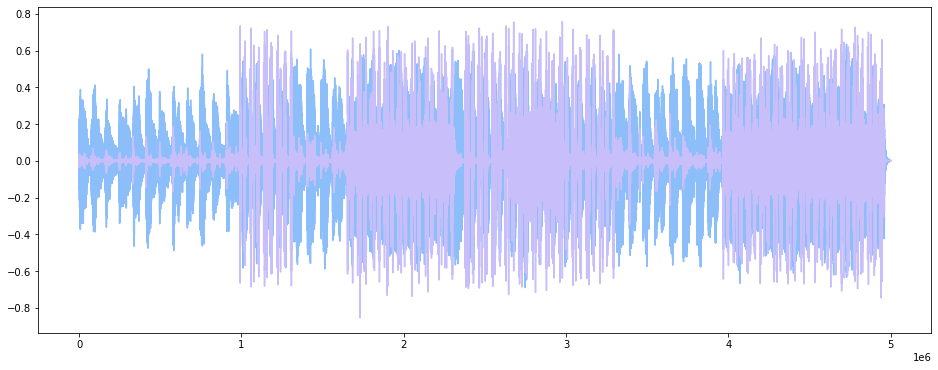

In [29]:
y_harm, y_perc = librosa.effects.hpss(audio_file)

plt.figure(figsize = (16, 6))
plt.plot(y_harm, color = '#8cbefa'); # 연하늘
plt.plot(y_perc, color = '#c8befa'); # 연보라

In [30]:
tempo, _ = librosa.beat.beat_track(y, sr = sr)
tempo

129.19921875

Centroids: [ 621.9759685   598.32934101  572.36647423 ... 1122.92810321 1083.87795733
  989.45096615] 

Shape of Spectral Centroids: (9767,) 

frames: range(0, 9767) 

t: [0.00000000e+00 2.32199546e-02 4.64399093e-02 ... 2.26719637e+02
 2.26742857e+02 2.26766077e+02]


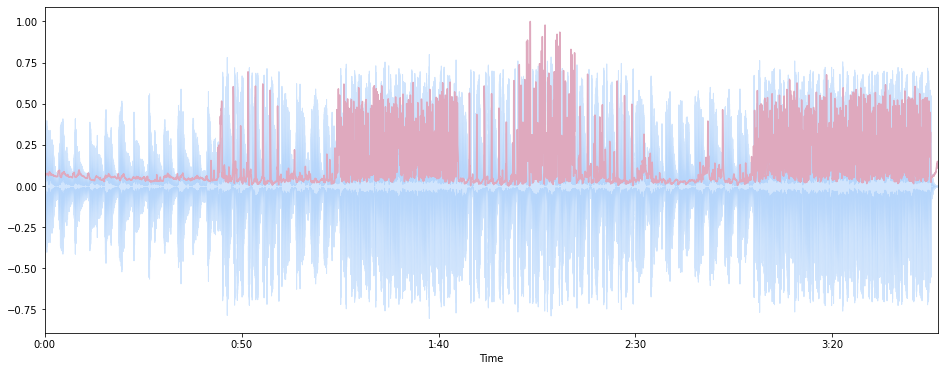

In [31]:
# Calculate the Spectral Centroids # 소리의 질량 중심 계산
spectral_centroids = librosa.feature.spectral_centroid(audio_file, sr=sr)[0]

# Shape is a vector
print('Centroids:', spectral_centroids, '\n')
print('Shape of Spectral Centroids:', spectral_centroids.shape, '\n')

# Computing the time variable for visualization
frames = range(len(spectral_centroids))

# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

print('frames:', frames, '\n')
print('t:', t)

# Function that normalizes the Sound Data
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

# Plotting the Spectral Centroid along the waveform
plt.figure(figsize = (16, 6))
librosa.display.waveplot(audio_file, sr=sr, alpha=0.4, color = '#8cbefa');
plt.plot(t, normalize(spectral_centroids), color='#dfa9be');

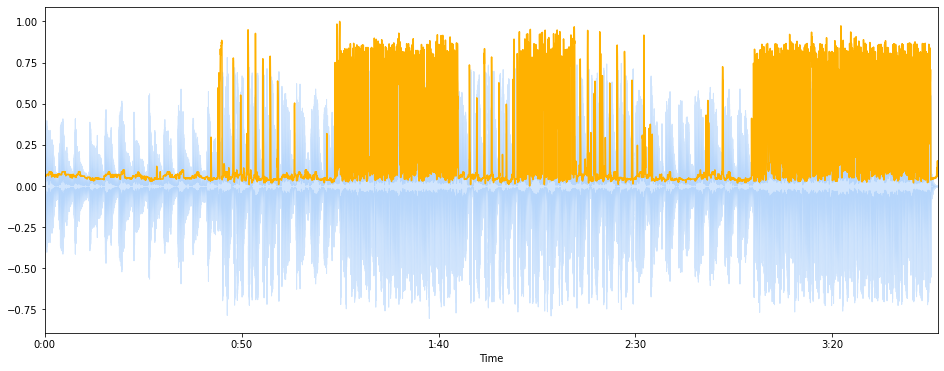

In [32]:
# Spectral RollOff Vector
spectral_rolloff = librosa.feature.spectral_rolloff(audio_file, sr=sr)[0]

# The plot
plt.figure(figsize = (16, 6))
librosa.display.waveplot(audio_file, sr=sr, alpha=0.4, color = '#8cbefa');
plt.plot(t, normalize(spectral_rolloff), color='#FFB100');

In [33]:
mfccs = librosa.feature.mfcc(audio_file, sr=sr)
print('mfccs shape:', mfccs.shape)

#Displaying  the MFCCs:
#plt.figure(figsize = (16, 6))
#librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap = 'cool');

mfccs shape: (20, 9767)


Mean: 0.0 

Var: 1.0


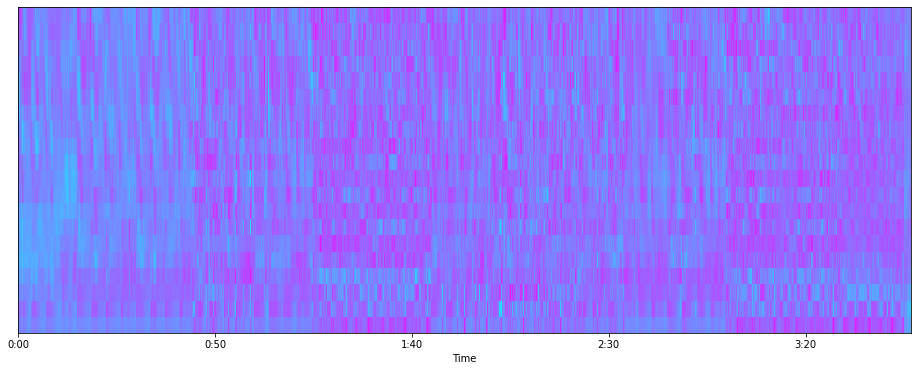

In [34]:
# Perform Feature Scaling
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print('Mean:', mfccs.mean(), '\n')
print('Var:', mfccs.var())

plt.figure(figsize = (16, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap = 'cool');

Chromogram shape: (12, 1001)


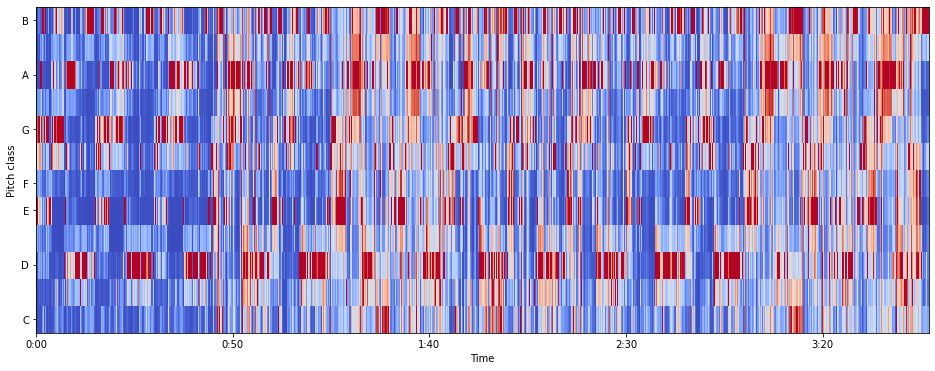

In [36]:
# Increase or decrease hop_length to change how granular you want your data to be
hop_length = 5000

# Chromogram
chromagram = librosa.feature.chroma_stft(audio_file, sr=sr, hop_length=hop_length)
print('Chromogram shape:', chromagram.shape)

plt.figure(figsize=(16, 6))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm');

In [ ]:
# 위 코드들에서 각 피쳐 추출에 필요한 코드만 뽑아서 정리하기
# 함수화 하기

In [26]:
# filename 함수 -> songs 가 노래제목들의 리스트
def song_names(audio_path):                      # audio_path : 음원 파일들의 폴더 경로
    files = list(os.listdir(f'{audio_path}'))

    songs = []
    paths = []

    for file in files:
        song = f'{file}'
        path = f'{audio_path}/{file}'
        songs.append(song)
        paths.append(path)

    return songs, paths

In [37]:
# length 함수 -> 하이라이트 부분만 자르기
def soundwave(paths):
    audio_files = []

    for path in paths:
        y, sr = librosa.load(path)
        y, _ = librosa.effects.trim(y)
        audio_files.append(y)

    return audio_files, sr                      # sr 디폴트 : 22050 / 변경 가능한 sr 수치 : 44100

In [ ]:
# 길이 자르기
# 참고 : https://da-nyee.github.io/posts/audio-how-to-trim-audio-data-with-librosa/
def soundwave(audio_file, save_file):
    sec = 60

    y, sr = librosa.load(audio_file)

    ny = y[30:30+sr*sec]

    librosa.output.write_wav(save_file + '.wav', ny, sr)

In [ ]:
# chroma_stft_mean, chroma_stft_var 함수 / chromagram.mean(), chromagram.var()
# Increase or decrease hop_length to change how granular you want your data to be
hop_length = 5000

# Chromogram
def chromagram(audio_file, sr, hop_length):
    chromagram = []
    
    chromagram = librosa.feature.chroma_stft(audio_file, sr=sr, hop_length=hop_length)

In [ ]:
# rms_mean, rms_var 함수
FRAME_LENGTH = 1024
HOP_LENGTH = 512

def rms(audio_file, frame_length, hop_length):
    rms = []

    for i in range(0, len(audio_file), hop_length):
        rms_current_frame = np.sqrt(np.sum(audio_file[i:i+frame_length]**2) / frame_length)
        rms.append(rms_current_frame)

    return np.array(rms)

In [ ]:
# spectral_centroid_mean, spectral_centroid_var 함수

In [ ]:
# spectral_bandwidth_mean, spectral_bandwidth_var 함수

In [ ]:
# rolloff_mean, rolloff_var 함수

In [ ]:
# zero_crossing_rate_mean, zero_crossing_rate_var 함수

In [ ]:
# harmony_mean, harmony_var 함수 / y_harm.mean(), y_harm.var()

In [ ]:
# perceptr_mean, perceptr_var / y_perc.mean(), y_perc.var()

In [ ]:
# tempo 함수
def tempo(audio_file, sr):
    tempo, _ = librosa.beat.beat_track(audio_file, sr = sr)
    return tempo

In [ ]:
# mfcc 1 ~ 20